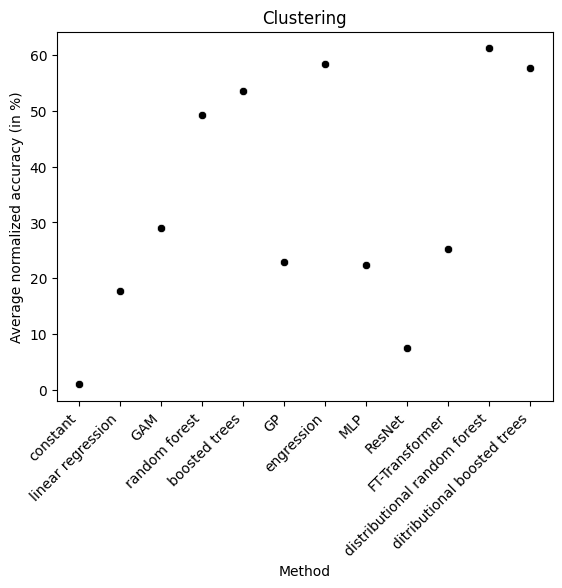

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.transforms import Bbox

directory = r'RESULTS/CLUSTERING'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_clustering_CRPS')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        CRPS = table['CRPS']
        CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
        second_largest = sorted(CRPS, reverse=True)[1]
        CRPS[CRPS > 5 * second_largest] = np.nan
        lowest_CRPS = table['CRPS'].min()
        mid_CRPS = sorted(CRPS, reverse=True)[2]
        df[task_name] = ((mid_CRPS - CRPS) / (mid_CRPS - lowest_CRPS)).clip(0, 1)

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average normalized accuracy (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Clustering')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/clustering_CRPS_only_num_features_normalized_accuracy.png',bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))

plt.show()

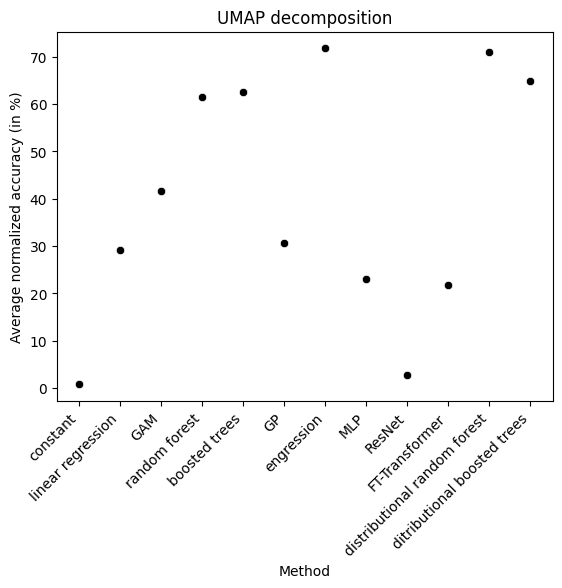

In [16]:
import os
import pandas as pd

directory = r'RESULTS/UMAP_DECOMPOSITION'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_umap_decomposition_CRPS')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        CRPS = table['CRPS']
        CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
        second_largest = sorted(CRPS, reverse=True)[1]
        CRPS[CRPS > 5 * second_largest] = np.nan
        lowest_CRPS = table['CRPS'].min()
        mid_CRPS = sorted(CRPS, reverse=True)[2]
        df[task_name] = ((mid_CRPS - CRPS) / (mid_CRPS - lowest_CRPS)).clip(0, 1)

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average normalized accuracy (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('UMAP decomposition')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/umap_decomposition_CRPS_only_num_features_normalized_accuracy.png', bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))

plt.show()

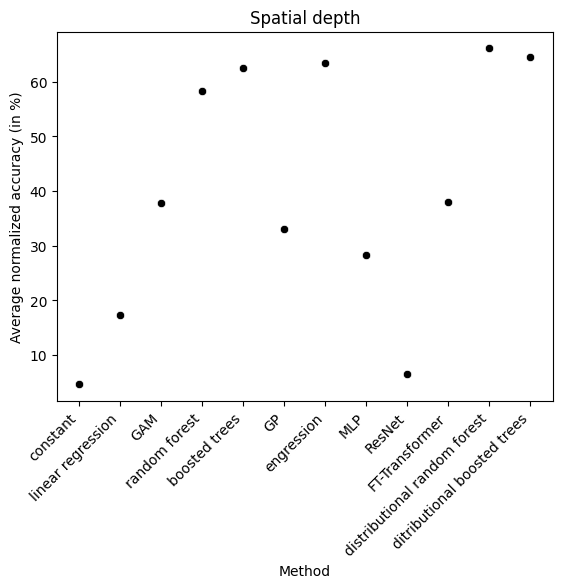

In [17]:
import os
import pandas as pd

directory = r'RESULTS/SPATIAL_DEPTH'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_spatial_depth_CRPS')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        CRPS = table['CRPS']
        CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
        second_largest = sorted(CRPS, reverse=True)[1]
        CRPS[CRPS > 5 * second_largest] = np.nan
        lowest_CRPS = table['CRPS'].min()
        mid_CRPS = sorted(CRPS, reverse=True)[2]
        df[task_name] = ((mid_CRPS - CRPS) / (mid_CRPS - lowest_CRPS)).clip(0, 1)

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average normalized accuracy (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Spatial depth')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/spatial_depth_CRPS_only_num_features_normalized_accuracy.png', bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))

plt.show()

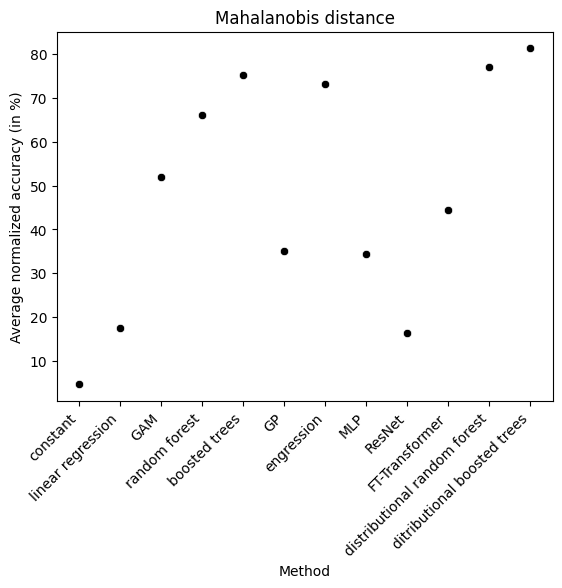

In [18]:
import os
import pandas as pd

directory = r'RESULTS/MAHALANOBIS'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_mahalanobis_CRPS')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        CRPS = table['CRPS']
        CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
        second_largest = sorted(CRPS, reverse=True)[1]
        CRPS[CRPS > 5 * second_largest] = np.nan
        lowest_CRPS = CRPS.min()
        mid_CRPS = sorted(CRPS, reverse=True)[2]
        df[task_name] = ((mid_CRPS - CRPS) / (mid_CRPS - lowest_CRPS)).clip(0, 1)

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average normalized accuracy (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Mahalanobis distance')
# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure

# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/mahalanobis_CRPS_only_num_features_normalized_accuracy.png', bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))

plt.show()

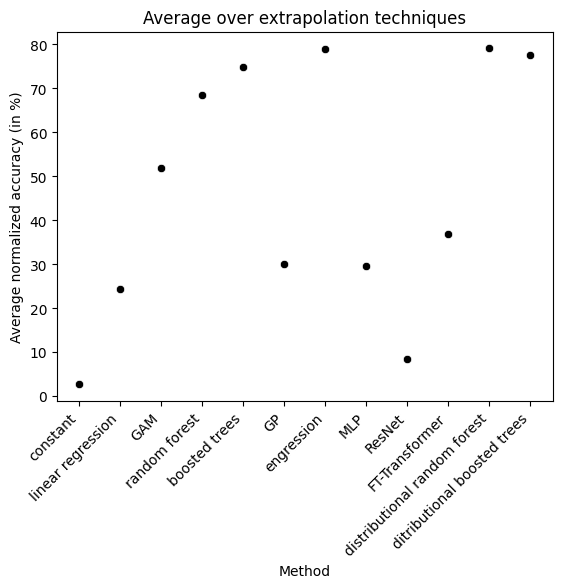

In [28]:
# Plotting the average test accuracy for all extrapolation methods
import os
import pandas as pd
import seaborn as sns

list_directories = [r'RESULTS/CLUSTERING', r'RESULTS/UMAP_DECOMPOSITION', r'RESULTS/SPATIAL_DEPTH', r'RESULTS/MAHALANOBIS']
df = pd.DataFrame()

for directory in list_directories:
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            task_name = filename
            filepath = os.path.join(directory, filename)
            table = pd.read_csv(filepath) 
            CRPS = table['CRPS']
            CRPS = CRPS.where(CRPS >= 0, other=float('nan'))
            second_largest = sorted(CRPS, reverse=True)[1]
            CRPS[CRPS > 5 * second_largest] = np.nan
            lowest_CRPS = np.nanmin(CRPS)
            mid_CRPS = sorted(CRPS, reverse=True)[2]
            df[task_name] = ((mid_CRPS - CRPS) / (mid_CRPS - lowest_CRPS)).clip(0, 1)

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans', 'drf', 'distributional_boosted_trees']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'drf': 'distributional random forest','boosted_trees': 'boosted trees','distributional_boosted_trees': 'ditributional boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average normalized accuracy (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Average over extrapolation techniques')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/average_over_extrapolation_techniques_CRPS_only_num_features_normalized_accuracy.png', bbox_inches=Bbox([[0,-1.5], [fig_size[0], fig_size[1]]]))

plt.show()

In [32]:
df.iloc[:,:4].mean(axis=1)

Method
constant                        0.000000
MLP                             0.148423
ResNet                          0.139079
FTTrans                         0.442085
distributional_boosted_trees    0.644740
drf                             0.601454
boosted_trees                   0.655310
rf                              0.607125
linear_regression               0.198866
engression                      0.872993
GAM                             0.451745
GP                              0.115489
dtype: float64

In [35]:
df

,361072_clustering_crps_results.csv,361073_clustering_crps_results.csv,361074_clustering_crps_results.csv,361076_clustering_crps_results.csv,361077_clustering_crps_results.csv,361078_clustering_crps_results.csv,361079_clustering_crps_results.csv,361080_clustering_crps_results.csv,361081_clustering_crps_results.csv,361082_clustering_crps_results.csv,...,361081_mahalanobis_crps_results.csv,361082_mahalanobis_crps_results.csv,361083_mahalanobis_crps_results.csv,361085_mahalanobis_crps_results.csv,361086_mahalanobis_crps_results.csv,361087_mahalanobis_crps_results.csv,361088_mahalanobis_crps_results.csv,361279_mahalanobis_crps_results.csv,361280_mahalanobis_crps_results.csv,361281_mahalanobis_crps_results.csv
Method,,,,,,,,,,,,,,,,,,,,,
constant,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120630,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.832285,0.000000,0.000000
MLP,0.011525,0.286282,0.295884,0.000000,0.835441,0.167019,0.439648,0.000000,0.117569,0.000000,...,0.675071,0.403878,0.000000,0.630202,0.575444,0.054627,0.528282,0.763890,0.241277,0.000000
ResNet,0.307802,0.248514,0.000000,0.000000,0.000000,0.000000,0.176040,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.931085,0.000000,0.000000,0.000000,0.590563,0.212601,0.046537
FTTrans,0.933632,0.213061,0.302276,0.319371,0.000000,0.078320,0.022397,0.132637,0.724505,0.011779,...,0.733552,0.362448,0.451883,0.729460,0.651537,0.617079,0.506616,0.818262,0.376502,0.020917
distributional_boosted_trees,0.703226,0.852805,0.417548,0.605382,0.855422,1.000000,1.000000,1.000000,0.926802,1.000000,...,0.981404,1.000000,0.697060,0.925374,0.706176,1.000000,0.957095,0.841915,0.522194,0.284098
drf,0.499495,0.906320,0.000000,1.000000,0.746237,0.810870,0.878818,0.927268,0.827044,0.867194,...,0.928772,0.893619,1.000000,0.825603,0.708242,0.539575,0.912643,1.000000,0.356538,1.000000
boosted_trees,0.952802,0.865777,0.284823,0.517840,0.838880,0.934759,0.839467,0.984083,0.938264,0.952406,...,0.992976,0.982040,0.584656,0.822544,0.712194,0.941772,0.788225,0.779501,0.000000,0.130909
rf,0.945126,0.827460,0.146593,0.509320,0.764464,0.814655,0.726884,0.954703,0.838429,0.893502,...,0.932453,0.874049,0.660511,0.830852,0.694908,0.417046,0.781435,0.849705,0.065877,0.156840
linear_regression,0.000000,0.027697,0.014049,0.753720,0.878176,0.000000,0.000000,0.848369,0.000000,0.036408,...,0.000000,0.000000,0.133733,0.000000,0.000000,0.000000,0.188442,0.000000,0.336973,0.092884


In [29]:
result_df

,Method,Mean,Median,Standard Deviation
0,constant,2.690964,0.000000,0.136689
8,linear regression,24.342793,0.064065,0.316296
10,GAM,51.862473,0.499984,0.379865
7,random forest,68.483022,0.784373,0.272827
6,boosted trees,74.813104,0.861714,0.276576
11,GP,30.103554,0.215654,0.329931
9,engression,78.914420,0.920706,0.279248
1,MLP,29.689909,0.242922,0.283379
2,ResNet,8.375533,0.000000,0.171406
3,FT-Transformer,36.777028,0.344567,0.292344


In [23]:
CRPS=[1,2,3,4,5, np.nan]
sorted(CRPS, reverse=True)

[5, 4, 3, 2, 1, nan]

In [27]:
np.nanmin(np.array(CRPS))

1.0